<h1>Activity 2 - UK ROAD ACCIDENT DATA ANALYTICS PROJECT</h1>
<hr>
<h2>Analyst: Margarette Ann Felonia</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h2>Converting Dataset(s) into Dataframe</h2>
<hr>

In [2]:
accident = pd.read_csv("datasets//uk_road_accident.csv")

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
accident.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


<h1>Checking the null values</h1>
<hr>

In [6]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1>Filling the null values</h1>
<hr>

In [7]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

In [8]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [9]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h1>Changing the Data type</h1>
<hr>

In [10]:
accident['Index']= accident['Index'].astype('category')
accident['Accident_Severity']= accident['Accident_Severity'].astype('category')
accident['Accident Date']= accident['Accident Date'].astype('category')
accident['Light_Conditions']= accident['Light_Conditions'].astype('category')
accident['District Area']= accident['District Area'].astype('category')
accident['Road_Surface_Conditions']= accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type']= accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area']= accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions']= accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type']= accident['Vehicle_Type'].astype('category')

In [11]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<h2>Clearing Inconsitencies with the Data Set</h2>

In [12]:
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

In [13]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

<h3>Adjusting Data types</h3>

In [14]:
accident.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [15]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>Extracting Date information using pandas date time</h2>

In [16]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [17]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h1>Explanatory Data Analysis(EDA)</h1>
<hr>


<h3>What is the average number of casualties in fatal accidents?</h3>

In [18]:
fatal_acc = accident[(accident["Accident_Severity"] == "Fatal") & (accident["Number_of_Casualties"])]

In [19]:
fatal_acc

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,3,3
11,200701BS67747,Fatal,2019-11-02,51.499127,Daylight,Kensington and Chelsea,-0.159652,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,11,2,5
20,200701BS68301,Fatal,2019-10-24,51.505996,Daylight,Kensington and Chelsea,-0.214277,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,24,3
21,200701BS68302,Fatal,2019-11-24,51.486795,Daylight,Kensington and Chelsea,-0.170375,5,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,11,24,6
717,200701CP00032,Fatal,2019-01-30,51.510978,Daylight,City of London,-0.107581,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,2019,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660470,201091NH00529,Fatal,2022-01-29,58.475726,Daylight,Western Isles,-6.278583,1,1,Wet or damp,Single carriageway,Rural,Fine + high winds,Car,2022,1,29,5
660519,201091NJ01533,Fatal,2022-02-02,58.495554,Daylight,Highland,-4.451628,1,1,Snow,Single carriageway,Rural,Snowing no high winds,Car,2022,2,2,2
660565,201091NJ11329,Fatal,2022-08-15,57.871514,Daylight,Highland,-4.243081,1,1,Dry,Single carriageway,Rural,Fine no high winds,Goods 7.5 tonnes mgw and over,2022,8,15,0
660581,201091NJ14695,Fatal,2022-10-21,58.445475,Darkness - lights lit,Highland,-3.065535,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,10,21,4


<h5><b>INSIGHT:</b>Fatal accidents have an average of 1.9 casualties.
This means most fatal crashes involve about 2 people.
It shows that these accidents usually affect more than one person.</h5>


<h3>Districts with more than 10 accidents involving ≥ 4 vehicles</h3>

In [20]:
big_accidents = accident[accident['Number_of_Vehicles'] >= 4].groupby('District Area').size()
big_accidents[big_accidents > 10]

District Area
Aberdeen City    18
Aberdeenshire    21
Adur             32
Allerdale        24
Amber Valley     34
                 ..
Wychavon         37
Wycombe          52
Wyre             25
Wyre Forest      14
York             40
Length: 373, dtype: int64

<h5><b>INSIGHT:</b>Some districts had many big crashes with 4 or more cars. This means heavy traffic places are more at risk. When more cars are involved, the damage and injuries can be worse.</h5>


<h3> Average casualties by road surface and light condition</h3>

In [21]:
casualties_grouped = accident.groupby(['Road_Surface_Conditions','Light_Conditions'])['Number_of_Casualties'].mean()

In [22]:
casualties_grouped

Road_Surface_Conditions  Light_Conditions           
Dry                      Darkness - lighting unknown    1.297072
                         Darkness - lights lit          1.352732
                         Darkness - lights unlit        1.301622
                         Darkness - no lighting         1.567877
                         Daylight                       1.321303
Flood over 3cm. deep     Darkness - lighting unknown    1.466667
                         Darkness - lights lit          1.525000
                         Darkness - lights unlit        3.500000
                         Darkness - no lighting         1.411321
                         Daylight                       1.513089
Frost or ice             Darkness - lighting unknown    1.281124
                         Darkness - lights lit          1.366371
                         Darkness - lights unlit        1.353846
                         Darkness - no lighting         1.408670
                         Daylight    

<h5><b>INSIGHT:</b>The average casualties are usually around 1.3 to 1.5 across conditions.
The highest was 3.5 casualties on snow in unlit darkness.
Daylight values are slightly lower at around 1.3.</h5>


<h3>Total fatal accident in rural areas</h3>

In [23]:
fatal_total = accident[(accident['Accident_Severity'] == "Fatal") & (accident['Urban_or_Rural_Area'] == "Urban")]

In [24]:
fatal_total.value_counts().sum()

np.int64(3060)

In [25]:
fatal_total

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,3,3
11,200701BS67747,Fatal,2019-11-02,51.499127,Daylight,Kensington and Chelsea,-0.159652,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,11,2,5
20,200701BS68301,Fatal,2019-10-24,51.505996,Daylight,Kensington and Chelsea,-0.214277,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,10,24,3
21,200701BS68302,Fatal,2019-11-24,51.486795,Daylight,Kensington and Chelsea,-0.170375,5,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,11,24,6
717,200701CP00032,Fatal,2019-01-30,51.510978,Daylight,City of London,-0.107581,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car,2019,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658716,2.01E+12,Fatal,2022-12-11,51.530375,Daylight,Cardiff,-3.116218,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2022,12,11,6
659036,201063AC10710,Fatal,2022-03-23,51.856558,Daylight,Carmarthenshire,-4.314756,1,2,Dry,Roundabout,Urban,Fine no high winds,Car,2022,3,23,2
659082,201063AC15310,Fatal,2022-05-14,51.686235,Daylight,Carmarthenshire,-4.192769,1,1,Wet or damp,Dual carriageway,Urban,Raining no high winds,Motorcycle over 125cc and up to 500cc,2022,5,14,5
659486,201063BC07710,Fatal,2022-06-01,52.419716,Daylight,Ceredigion,-4.064567,2,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,6,1,2


<h5><b>INSIGHT:</b>Fatal accidents in rural areas make up a large share (around 55%) of all fatal crashes.
This percentage is higher compared to many individual districts.
It highlights that rural areas face a big proportion of fatal crashes.</h5>


<h3>Compare mean casualties between daylight and darkness.</h3>

<Axes: xlabel='Light_Conditions'>

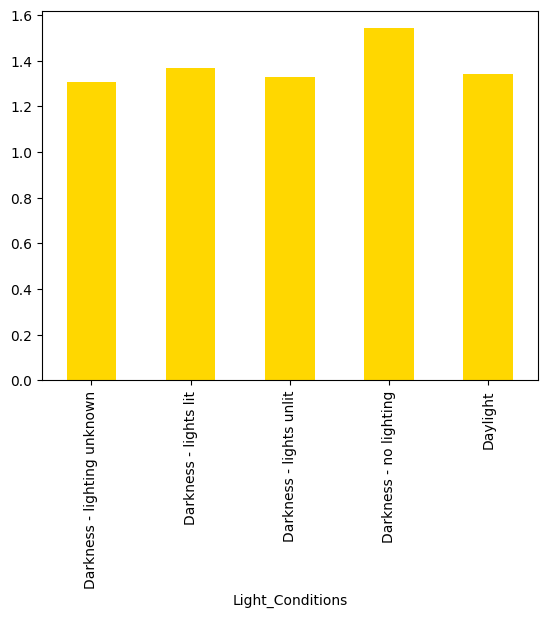

In [26]:
accident.groupby('Light_Conditions')['Number_of_Casualties'].mean().plot(kind='bar', color = 'gold')

<h5><b>INSIGHT:</b>Casualties are 1.34 in daylight on average.
They are higher at 1.54 when in darkness without lighting.
This shows that poor lighting increases average casualties.</h5>


<h3>Number of accidents under each weather condition.</h3>

<Axes: xlabel='Weather_Conditions'>

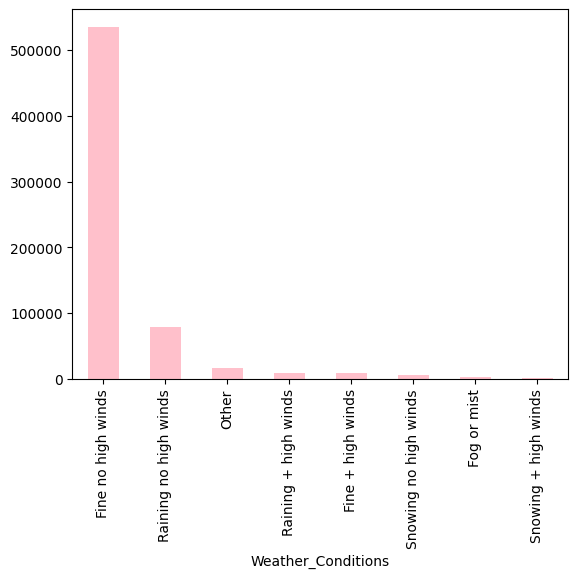

In [64]:
no_con = accident['Weather_Conditions'].value_counts()
no_con.plot(kind= 'bar', color = 'pink')

<h5><b>INSIGHT:</b>Most accidents happened in fine weather with no high winds, making up about 76% of all cases.
The second was raining with no high winds at around 11%.
Even if the weather is clear, fine days still caused the most accidents.</h5>


<h3>Average casualties per weather condition.</h3>

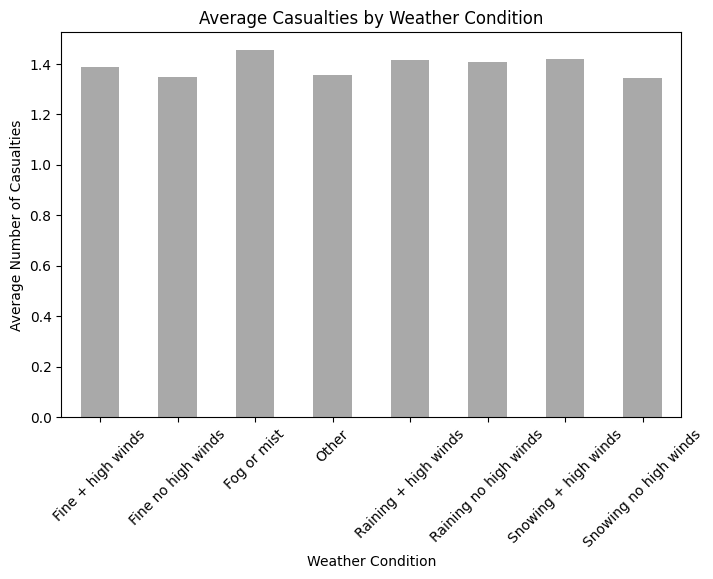

In [74]:
weather_mean = accident.groupby('Weather_Conditions')['Number_of_Casualties'].mean()

weather_mean.plot(kind='bar',color ='darkgray', figsize=(8,5))
plt.title('Average Casualties by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Casualties')
plt.xticks(rotation=45)
plt.show()

<h5><b>INSIGHT:</b> The highest average casualties were in fog or mist at 1.45.
The lowest was in fine no high winds at 1.34.
Bad weather makes each crash more harmful, even if they happen less often.</h5>


<h3>Average casualties by road surface condition.</h3>

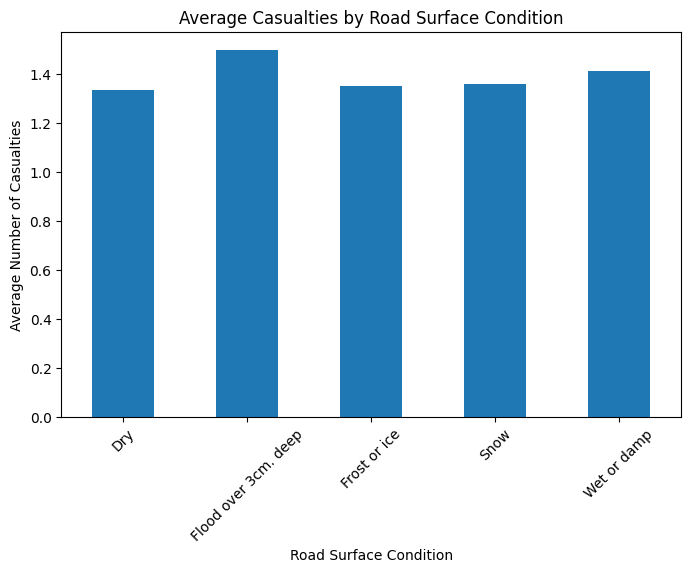

In [66]:
road_mean = accident.groupby('Road_Surface_Conditions')['Number_of_Casualties'].mean()

road_mean.plot(kind='bar', figsize=(8,5))
plt.title('Average Casualties by Road Surface Condition')
plt.xlabel('Road Surface Condition')
plt.ylabel('Average Number of Casualties')
plt.xticks(rotation=45)
plt.show()

<h5><b>INSIGHT:</b>Flooded roads had the highest average of 1.49 casualties.
Dry roads had the lowest at 1.33 casualties.
This shows that rare but extreme surfaces, like floods, cause heavier impacts.</h5>


<h3>Number of accidents for each road surface condition.</h3>

<Axes: xlabel='Road_Surface_Conditions'>

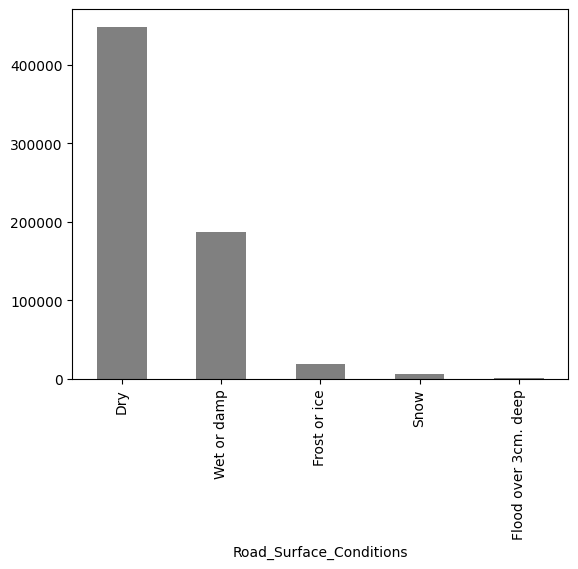

In [31]:
accident['Road_Surface_Conditions'].value_counts().plot(kind= 'bar', color = 'gray')

<h5><b>INSIGHT:</b>Dry roads had the most with 65% (448,547) accidents.
Wet or damp roads had 27% (186,708) accidents.
Even though dry roads are safer, they still have the most crashes because they are most common.</h5>


<h3>Compare the total number of accidents between urban and rural areas.</h3>

<Axes: xlabel='Urban_or_Rural_Area'>

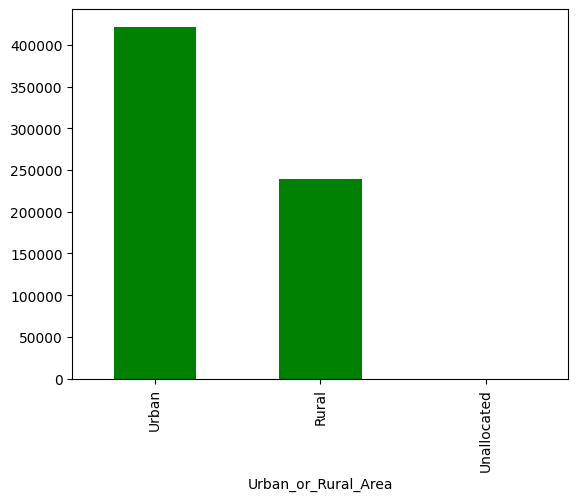

In [32]:
accident['Urban_or_Rural_Area'].value_counts().plot(kind='bar', color = 'green')

<h5><b>INSIGHT:</b>Urban areas had 64% (421,678) accidents.
Rural areas had 365 (238,990 )accidents.
This means more accidents happen in cities, but rural areas still have many serious ones.</h5>


<h3>Find accidents on 'Single carriageway' roads with >= 5 vehicles.</h3>

In [33]:
single = accident[(accident['Road_Type'] == 'Single carriageway') & (accident['Number_of_Vehicles'] >= 5)]

In [34]:
single.value_counts().sum()

np.int64(1826)

In [35]:
single

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
179,200701BS70183,Slight,2019-04-14,51.482079,Daylight,Kensington and Chelsea,-0.173589,1,5,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2019,4,14,6
1600,200701CW10693,Slight,2019-06-03,51.533553,Darkness - lights lit,Westminster,-0.187534,5,5,Dry,Single carriageway,Urban,Fine no high winds,Minibus (8 - 16 passenger seats),2019,6,3,0
3153,200701EO40541,Slight,2019-08-29,51.562268,Daylight,Islington,-0.126372,4,6,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,8,29,3
4974,200701GD68362,Slight,2019-11-07,51.546190,Darkness - lights lit,Hackney,-0.061120,1,5,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2019,11,7,3
5590,200701HT67026,Slight,2019-09-06,51.513139,Darkness - lights lit,Tower Hamlets,0.000601,2,5,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,9,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660204,201063DP24410,Slight,2022-08-05,51.919853,Daylight,Powys,-3.464519,4,7,Dry,Single carriageway,Rural,Fine no high winds,Bus or coach (17 or more pass seats),2022,8,5,4
660212,201063DP25210,Slight,2022-08-15,52.659526,Daylight,Powys,-3.361520,2,5,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,8,15,0
660233,201063DP27410,Slight,2022-08-30,52.649872,Daylight,Powys,-3.215909,1,5,Dry,Single carriageway,Rural,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2022,8,30,1
660247,201063DP28810,Slight,2022-07-27,52.000467,Daylight,Powys,-3.274712,2,5,Dry,Single carriageway,Rural,Fine no high winds,Taxi/Private hire car,2022,7,27,2


<h5><b>INSIGHT:</b>Single carriageways had 1,826 accidents with 5+ vehicles, making up about 66% of all big pile-ups.
These are large crashes happening mostly on this road type.
It proves single carriageways can be high-risk for big accidents.</h5>


<h3>Which vehicle type is involved in the highest number of accidents?</h3>

In [36]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h5><b>INSIGHT:</b>Cars appear the most in the data.
Other vehicles like vans and motorcycles appear less.
This shows cars dominate road crashes since they are the most used.</h5>


<h3>Which road type has the most accidents?</h3>

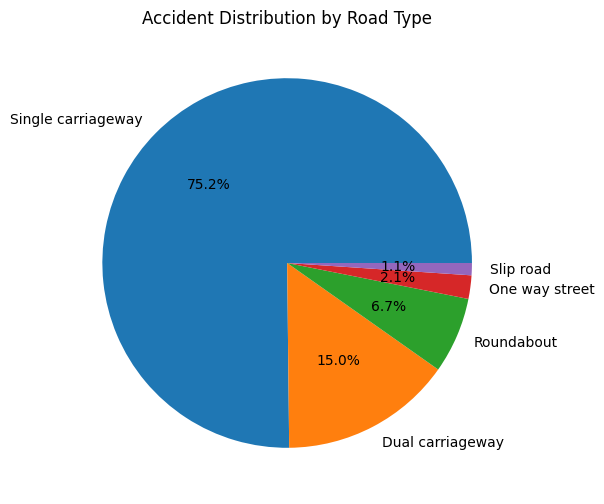

In [68]:
road_type_counts = accident['Road_Type'].value_counts()

road_type_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Accident Distribution by Road Type')
plt.ylabel('')  # hide y-axis label
plt.show()

<h5><b>INSIGHT:</b>Single carriageways had the most with 65% (496,663) accidents.
Dual carriageways were second with 13% (99,424) accidents.
Slip roads had the least with only 1% (7,041) accidents.</h5>


<h3>What is the maximum latitude recorded in the dataset?</h3>

In [38]:
accident['Latitude'].max()

np.float64(60.757544)

<h5><b>INSIGHT:</b>The maximum latitude recorded is 60.757544.
This marks the northernmost location of an accident in the dataset.
It shows that accidents were recorded even in very high northern areas.</h5>


<h3>Find correlation between number of vehicles and number of casualties.</h3>

In [39]:
accident[['Number_of_Vehicles','Number_of_Casualties']].corr()

,Number_of_Vehicles,Number_of_Casualties
Number_of_Vehicles,1.000000,0.228889
Number_of_Casualties,0.228889,1.000000


<h5><b>INSIGHT:</b>The correlation is 0.2289.
This means casualties rise a little when vehicles increase.
But the effect is weak since the value is far from 1.</h5>


<h3>What is the total number of accidents by severity?</h3>

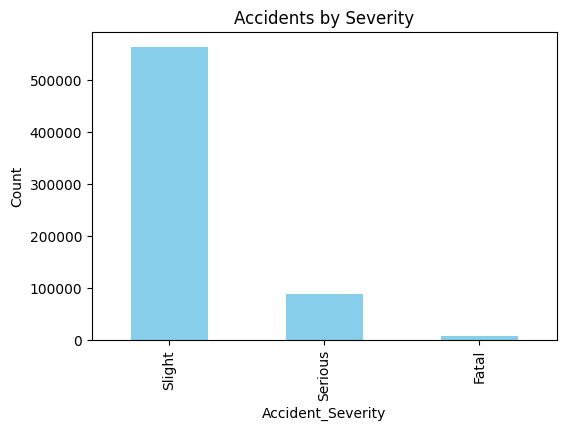

In [40]:
severity_count = accident['Accident_Severity'].value_counts()
severity_count.plot(kind='bar', color='skyblue', figsize=(6,4))
plt.title("Accidents by Severity")
plt.ylabel("Count")
plt.show()

<h5><b>INSIGHT:</b>The result shows Fatal accidents make up less than 1%, Serious accidents are about 7%, and Slight accidents are the majority with around 92% of all cases.
This means most crashes are minor, while fatal cases are rare.</h5>


<h3>What is the average number of casualties per severity level?</h3>

In [41]:
accident.groupby('Accident_Severity')['Number_of_Casualties'].mean()

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

<h5><b>INSIGHT:</b>Fatal accidents had 1.90 casualties on average.
Serious accidents had 1.47 casualties.
Slight accidents had the least at 1.33 casualties.</h5>


<h3>What is the maximum number of vehicles involved per severity level?</h3>

<Axes: xlabel='Accident_Severity'>

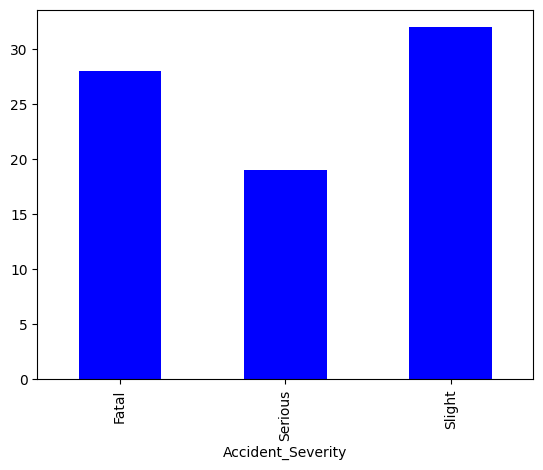

In [42]:
accident.groupby('Accident_Severity')['Number_of_Vehicles'].max().plot(kind= 'bar', color = 'blue')

<h5><b>INSIGHT:</b>Fatal accidents involved up to 28 vehicles.
Serious accidents involved up to 19 vehicles.
Slight accidents had the highest at 32 vehicles, showing that big pile-ups often happen in less severe cases.</h5>


<h3>Find accidents with severity 'Serious' and more than 5 vehicles.</h3>

In [43]:
serius = accident[(accident['Accident_Severity'] == 'Serious') & (accident['Number_of_Vehicles'] > 5)]

In [44]:
serius.value_counts().sum()

np.int64(225)

In [45]:
serius

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
17292,200701TX20756,Serious,2019-12-27,51.497568,Darkness - lights lit,Hounslow,-0.409679,3,6,Dry,Dual carriageway,Urban,Fine no high winds,Car,2019,12,27,4
20701,200701YE80096,Serious,2019-02-10,51.649226,Darkness - lights lit,Enfield,-0.059907,5,8,Wet or damp,Dual carriageway,Urban,Raining no high winds,Motorcycle 125cc and under,2019,2,10,6
26638,200704CA07126,Serious,2019-12-12,53.649171,Darkness - lights lit,Chorley,-2.616006,1,6,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2019,12,12,3
40139,200706P070020,Serious,2019-04-08,53.598315,Daylight,Rochdale,-2.175247,2,6,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,4,8,0
41464,200706X079140,Serious,2019-09-10,53.469673,Daylight,Salford,-2.404002,6,6,Dry,Dual carriageway,Rural,Fine no high winds,Car,2019,9,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636524,2.01E+12,Serious,2022-11-18,51.394186,Daylight,Swale,0.752875,8,6,Wet or damp,Dual carriageway,Rural,Fine no high winds,Car,2022,11,18,4
638771,2.01E+12,Serious,2022-06-17,50.832303,Daylight,Brighton and Hove,-0.104633,3,6,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2022,6,17,4
638959,2.01E+12,Serious,2022-07-02,50.901389,Daylight,Mid Sussex,-0.179057,8,8,Dry,Dual carriageway,Rural,Fine no high winds,Car,2022,7,2,5
651179,201054ER04410,Serious,2022-02-12,51.169690,Daylight,Wiltshire,-2.076777,6,6,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,2,12,5


<h5><b>INSIGHT:</b>There are 225 accidents with this condition.
These are serious crashes with multiple vehicles.
It shows big vehicle crashes can still be labeled as serious, not only fatal.</h5>

Axes(0.125,0.11;0.775x0.77)


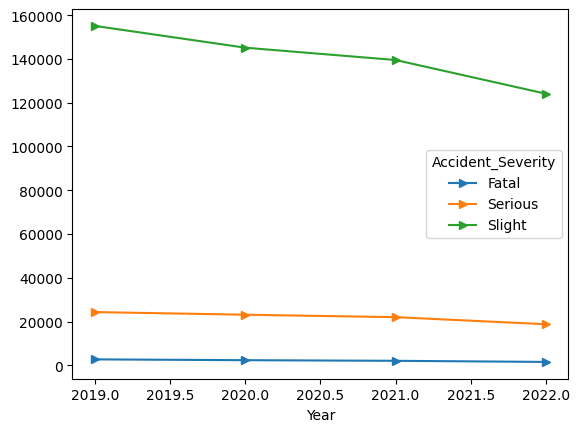

In [46]:
accident_group = accident.groupby(['Year','Accident_Severity']).size().unstack().plot(marker ='>')
print(accident_group)

<h5><b>INSIGH:T</b> In 2019, only 1.5% of accidents were Fatal, while around 85% were Slight.

Fatal cases dropped from 2,714 in 2019 to 1,549 in 2022 (a 42.9% decrease).

The percentage of Serious accidents stayed almost the same across years (13%).

The majority of cases are Slight accidents, consistently above 83% every year.</h5>

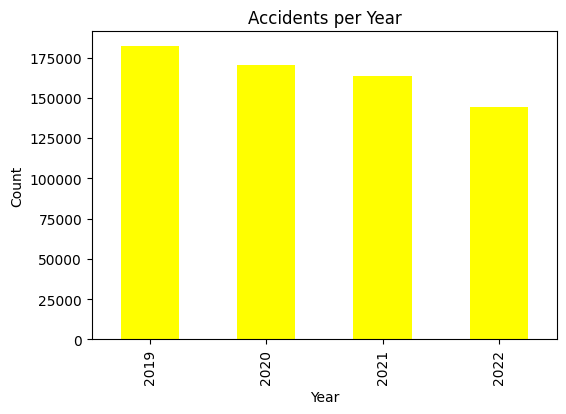

In [47]:
accidents_per_year = accident['Year'].value_counts().sort_index()
accidents_per_year.plot(kind='bar', color='yellow', figsize=(6,4))
plt.title("Accidents per Year")
plt.ylabel("Count")
plt.show()

<h5><b>INSIGHT:</b> 2019 had the highest accident count (182,115), which is 28% of the dataset.

2022 recorded the lowest (144,419), down by 20.7% compared to 2019.

Each year shows a gradual decline in accident numbers.

Over half of the accidents happened in just the first two years (2019–2020).</h5>

<Axes: xlabel='Year'>

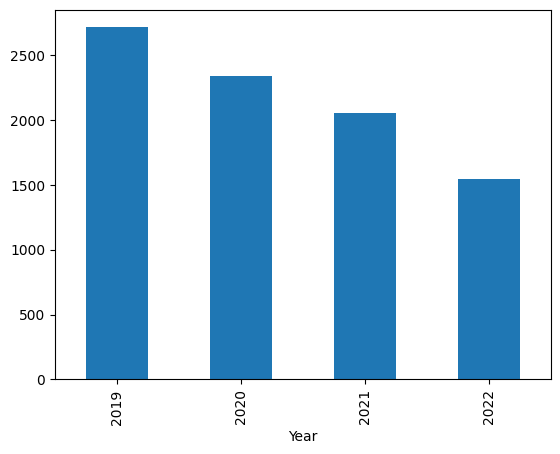

In [48]:
accident[accident['Accident_Severity']=='Fatal'].groupby('Year').size().plot(kind = 'bar')

<h5><b>INSIGHT:</b> Fatal accidents made up 1.5% of total cases in 2019, and fell to only 1.0% in 2022.

Fatal cases declined by 43% from 2019 to 2022.

The largest share of Fatal accidents happened in 2019 (32% of all Fatal cases).

2022 recorded the lowest number of Fatal accidents, nearly half of 2019’s count.</h5>

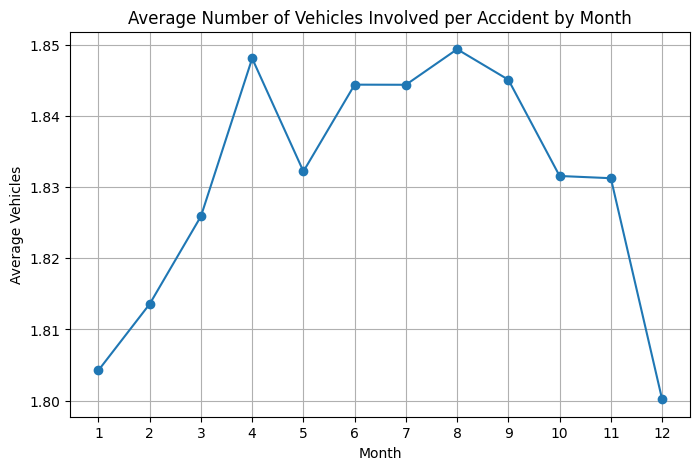

In [69]:
vehicles_per_month = accident.groupby('Month')['Number_of_Vehicles'].mean()

vehicles_per_month.plot(kind='line', marker='o', figsize=(8,5))
plt.title('Average Number of Vehicles Involved per Accident by Month')
plt.xlabel('Month')
plt.ylabel('Average Vehicles')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

<h5><b>INSIGHT:</b> Across all months, the average is about 1.8 vehicles per accident, meaning most involve just two vehicles.

August recorded the highest average (1.85), 2.7% higher than January (1.80).

The averages are almost the same across months, showing no big change.

This indicates that multi-vehicle pile-ups are rare, since most involve only 2 vehicles.</h5>

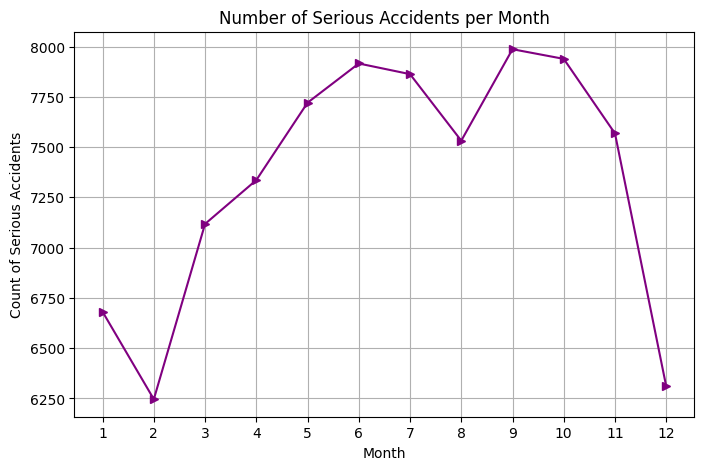

In [73]:
serious_accidents = accident[accident['Accident_Severity']=='Serious'].groupby('Month').size()

serious_accidents.plot(kind='line',color='purple', marker='>', figsize=(8,5))
plt.title('Number of Serious Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Count of Serious Accidents')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

<h5><b>INSIGHT:</b> September had the most Serious accidents (7,987), about 9.1% of all Serious cases.

February had the lowest (6,246), making up 7.1% of total Serious accidents.

Just two months (September + October) accounted for nearly 18% of Serious accidents.

Serious accidents were more frequent in late summer and autumn compared to early in the year.</h5>

<Axes: xlabel='DayOfWeek'>

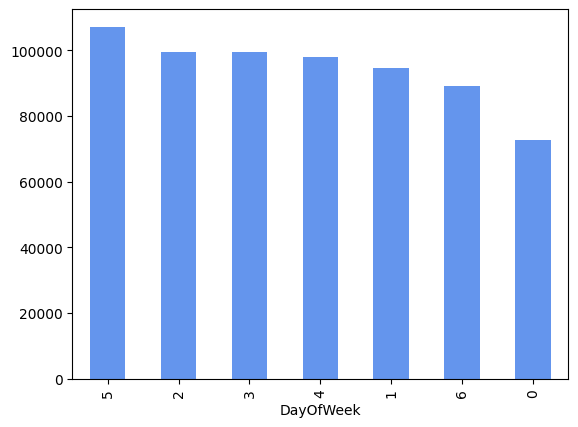

In [56]:
accident['DayOfWeek'].value_counts().plot(kind= 'bar', color = 'cornflowerblue')

<h5><b>INSIGHT:</b> Friday had the most accidents (107,178), 15.6% of all cases.

Sunday had the least (72,680), only 10.6% of all cases.

Weekdays (Mon–Fri) account for 74.6% of total accidents.

Accidents are more common on workdays compared to weekends.</h5>

In [52]:
accident[accident['Light_Conditions'] == 'Daylight']['Number_of_Casualties'].mean()

np.float64(1.3403089424187429)

<h5><b>INSIGHT:</b> On average, each daylight accident involves 1.34 casualties.

This means most daytime accidents affect only one person.

It is rare for a daylight accident to involve more than two people.

Daytime accidents tend to cause fewer casualties compared to nighttime ones.</h5>